# Data Loading and Processing

In [1]:
import os 
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

csv_file = "Final.csv"

if os.path.isfile(csv_file):
    data1 = pd.read_csv(csv_file)
    
    data2 = data1[data1['Year'] >= 1995]
    
    # Reset the index of the DataFrame
    data2.reset_index(drop=True, inplace=True)
    columns_to_check = ['Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']
    df = data1.loc[(data1[columns_to_check] != 0).any(axis=1)]
    
    
    print(data1.head())
    print(data2.head(10))
    df.reset_index(drop=True, inplace=True)
    
    print(df.head(20))
    
else:
    print(f"CSV file '{csv_file}' does not exist.")

   Unnamed: 0       Entity Code  Year  Cellular Subscription  \
0           0  Afghanistan  AFG  1980                    0.0   
1           1  Afghanistan  AFG  1981                    0.0   
2           2  Afghanistan  AFG  1982                    0.0   
3           3  Afghanistan  AFG  1983                    0.0   
4           4  Afghanistan  AFG  1984                    0.0   

   Internet Users(%)  No. of Internet Users  Broadband Subscription  
0                0.0                      0                     0.0  
1                0.0                      0                     0.0  
2                0.0                      0                     0.0  
3                0.0                      0                     0.0  
4                0.0                      0                     0.0  
   Unnamed: 0       Entity Code  Year  Cellular Subscription  \
0          15  Afghanistan  AFG  1995               0.000000   
1          16  Afghanistan  AFG  1996               0.000000   
2  

In [2]:
df

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,21,Afghanistan,AFG,2001,0.000000,0.004723,930,0.000000
1,22,Afghanistan,AFG,2002,0.110616,0.004561,958,0.000000
2,23,Afghanistan,AFG,2003,0.844564,0.087891,19903,0.000000
3,24,Afghanistan,AFG,2004,2.426528,0.105809,24922,0.000809
4,25,Afghanistan,AFG,2005,4.677583,1.224148,298829,0.000858
...,...,...,...,...,...,...,...,...
6445,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
6446,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
6447,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
6448,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


In [3]:
df.dtypes

Unnamed: 0                  int64
Entity                     object
Code                       object
Year                        int64
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

In [4]:
df.drop('Unnamed: 0', axis=1)

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,Afghanistan,AFG,2001,0.000000,0.004723,930,0.000000
1,Afghanistan,AFG,2002,0.110616,0.004561,958,0.000000
2,Afghanistan,AFG,2003,0.844564,0.087891,19903,0.000000
3,Afghanistan,AFG,2004,2.426528,0.105809,24922,0.000809
4,Afghanistan,AFG,2005,4.677583,1.224148,298829,0.000858
...,...,...,...,...,...,...,...
6445,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
6446,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
6447,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
6448,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


In [5]:
df.tail(10)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
6440,8857,Zimbabwe,ZWE,2011,71.349236,8.400000,1094166,0.263682
6441,8858,Zimbabwe,ZWE,2012,96.178352,12.000000,1591840,0.548259
6442,8859,Zimbabwe,ZWE,2013,102.118248,15.500000,2101090,0.778375
6443,8860,Zimbabwe,ZWE,2014,86.839676,16.364740,2267459,1.120463
6444,8861,Zimbabwe,ZWE,2015,92.347107,22.742819,3219232,1.187053
6445,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
6446,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
6447,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
6448,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818
6449,8866,Zimbabwe,ZWE,2020,88.755806,29.299999,4591211,1.368916


# Statistical Procedures

In [6]:
from scipy.stats import stats, linregress
import statistics 

slope, intercept, r_value, p_value, std_err = linregress(df['Cellular Subscription'], df['Internet Users(%)'])
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"p-value: {p_value}")
print(f"Standard Error: {std_err}")

Intercept: 0.10760249123718424
R-squared: 0.6165233856184006
p-value: 0.0
Standard Error: 0.004166749136197093


In [7]:
df.describe()

,Unnamed: 0,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
count,6450.000000,6450.000000,6450.000000,6450.000000,6.450000e+03,6450.000000
mean,4464.147132,2005.387752,54.974869,23.430334,1.497269e+07,6.104751
std,2550.840275,9.148888,53.766400,29.050351,1.462194e+08,10.985601
min,21.000000,1980.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2270.250000,1998.000000,2.145186,0.235705,1.776250e+03,0.000000
50%,4453.500000,2006.000000,42.328596,7.500000,1.302970e+05,0.085716
75%,6674.750000,2013.000000,101.570324,41.793160,2.337555e+06,7.165453
max,8866.000000,2020.000000,436.103027,100.000000,4.699886e+09,78.524361


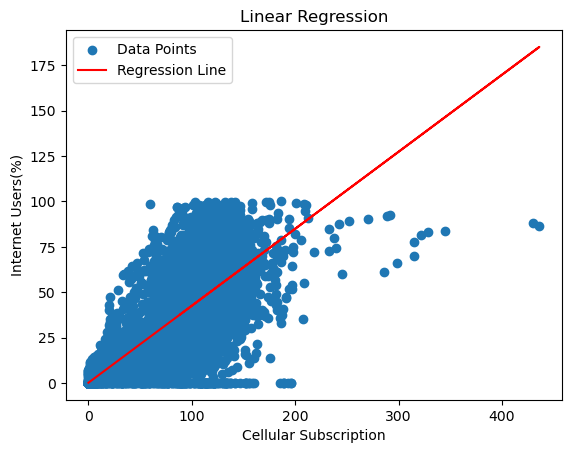

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df['Cellular Subscription'], df['Internet Users(%)'], label='Data Points')

# Plotting the regression line
x = df['Cellular Subscription']
y = intercept + slope * x
plt.plot(x, y, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Cellular Subscription')
plt.ylabel('Internet Users(%)')
plt.title('Linear Regression')
plt.legend()

# Display the plot
plt.show()

In [35]:
# Calculate the average broadband subscription by country
average_broadband = df.groupby('Entity')['Broadband Subscription'].mean()
print(average_broadband)

Entity
Afghanistan        0.013178
Albania            4.077770
Algeria            2.132593
American Samoa     0.000000
Andorra           18.982049
                    ...    
Vietnam            3.811711
World              3.984538
Yemen              0.416647
Zambia             0.096980
Zimbabwe           0.438306
Name: Broadband Subscription, Length: 229, dtype: float64


In [49]:
# Get the top 5 countries with the largest number of internet users
top_internet_users = df.nlargest(10, 'No. of Internet Users')[['Entity', 'No. of Internet Users']]
print('Top 5 countries with the largest number of internet users:')
print(top_internet_users)

# Get the top 5 countries with the largest broadband subscriptions
top_broadband_subscriptions = df.nlargest(10, 'Broadband Subscription')[['Entity', 'Broadband Subscription']]
print('Top 5 countries with the largest broadband subscriptions:')
print(top_broadband_subscriptions)


Top 5 countries with the largest number of internet users:
     Entity  No. of Internet Users
6366  World             4699886462
6365  World             4194081858
6364  World             3795522333
6363  World             3483746104
6362  World             3256215846
6361  World             3004582521
6360  World             2793663749
6359  World             2598607664
6358  World             2426854827
6357  World             2218882121
Top 5 countries with the largest broadband subscriptions:
                     Entity  Broadband Subscription
1024         Cayman Islands               78.524361
2227              Gibraltar               62.357899
614                 Bermuda               62.280621
612                 Bermuda               61.325298
611                 Bermuda               60.906902
2226              Gibraltar               57.852882
4909  Saint Kitts and Nevis               56.392036
2225              Gibraltar               56.287441
4906  Saint Kitts and Nevis   

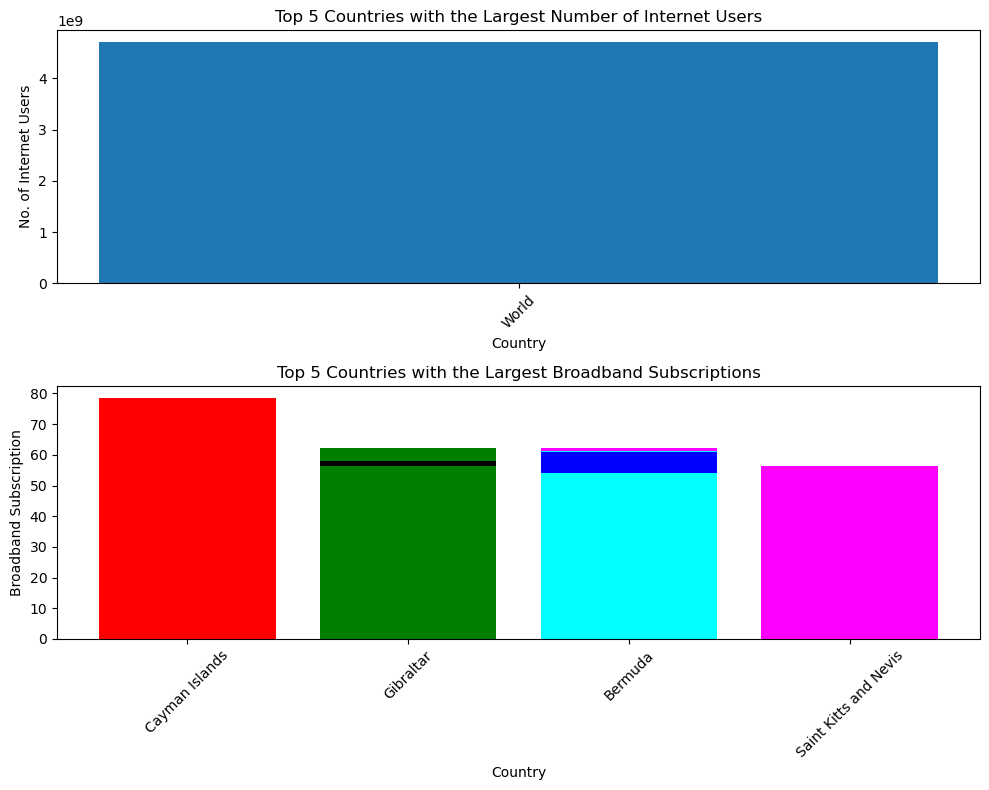

In [70]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
# Plot the top countries with the largest number of internet users
axs[0].bar(top_internet_users['Entity'], top_internet_users['No. of Internet Users'])
axs[0].set_xlabel('Country')
axs[0].set_ylabel('No. of Internet Users')
axs[0].set_title('Top 5 Countries with the Largest Number of Internet Users')
axs[0].tick_params(axis='x', rotation=45)

# Plot the top countries with the largest broadband subscriptions
colors = ['red', 'green', 'magenta', 'cyan', 'blue', 'black']
axs[1].bar(top_broadband_subscriptions['Entity'], top_broadband_subscriptions['Broadband Subscription'], color=colors)
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Broadband Subscription')
axs[1].set_title('Top 5 Countries with the Largest Broadband Subscriptions')
axs[1].tick_params(axis='x', rotation=45)

# Adjust spacing between the plots
plt.tight_layout()

# Show the combined subplot
plt.show()

In [58]:
# Get the bottom 10 countries with the smallest number of internet users
bottom_internet_users = df[df['No. of Internet Users'] > 0].nsmallest(10, 'No. of Internet Users')[['Entity', 'No. of Internet Users']]
print('Bottom 10 countries with the smallest number of internet users:')
print(bottom_internet_users)

# Get the bottom 10 countries with the smallest broadband subscriptions
bottom_broadband_subscriptions = df[df['Broadband Subscription'] > 0].nsmallest(10, 'Broadband Subscription')[['Entity', 'Broadband Subscription']]
print('Bottom 10 countries with the smallest broadband subscriptions:')
print(bottom_broadband_subscriptions)


Bottom 10 countries with the smallest number of internet users:
                Entity  No. of Internet Users
1305              Cuba                     10
1762          Eswatini                     10
1787          Ethiopia                     10
2363            Guinea                     10
4169     New Caledonia                     10
3677  Marshall Islands                     19
448           Barbados                     20
1245     Cote d'Ivoire                     29
5723          Thailand                     29
2261         Greenland                     30
Bottom 10 countries with the smallest broadband subscriptions:
           Entity  Broadband Subscription
5406  South Sudan                0.000021
5407  South Sudan                0.000041
1796     Ethiopia                0.000047
1795     Ethiopia                0.000079
1797     Ethiopia                0.000080
2733         Iraq                0.000095
5673   Tajikistan                0.000153
1175      Comoros              

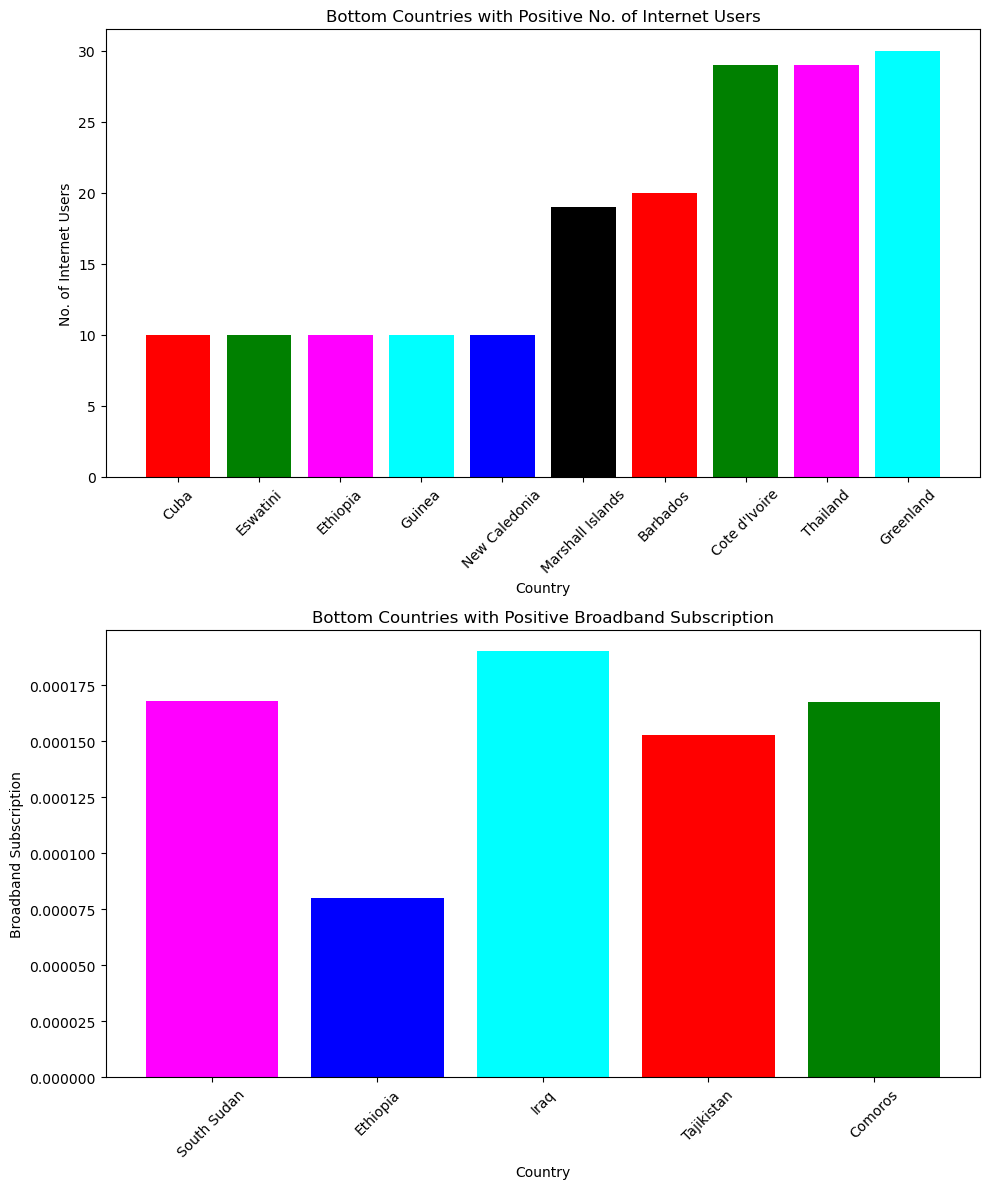

In [67]:
# Filter the bottom countries with positive values for No. of Internet Users
filtered_bottom_internet_users = bottom_internet_users[bottom_internet_users['No. of Internet Users'] > 0]

# Filter the bottom countries with positive values for Broadband Subscription
filtered_bottom_broadband_subscriptions = bottom_broadband_subscriptions[bottom_broadband_subscriptions['Broadband Subscription'] > 0]

# Create a subplot with two plots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the filtered bottom countries with positive values for No. of Internet Users
colors = ['red', 'green', 'magenta', 'cyan', 'blue', 'black']
axs[0].bar(filtered_bottom_internet_users['Entity'], filtered_bottom_internet_users['No. of Internet Users'], color=colors)
axs[0].set_xlabel('Country')
axs[0].set_ylabel('No. of Internet Users')
axs[0].set_title('Bottom Countries with Positive No. of Internet Users')
axs[0].tick_params(axis='x', rotation=45)

# Plot the filtered bottom countries with positive values for Broadband Subscription
axs[1].bar(filtered_bottom_broadband_subscriptions['Entity'], filtered_bottom_broadband_subscriptions['Broadband Subscription'], color=colors)
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Broadband Subscription')
axs[1].set_title('Bottom Countries with Positive Broadband Subscription')
axs[1].tick_params(axis='x', rotation=45)

# Adjust spacing between the plots
plt.tight_layout()

# Show the combined subplot
plt.show()





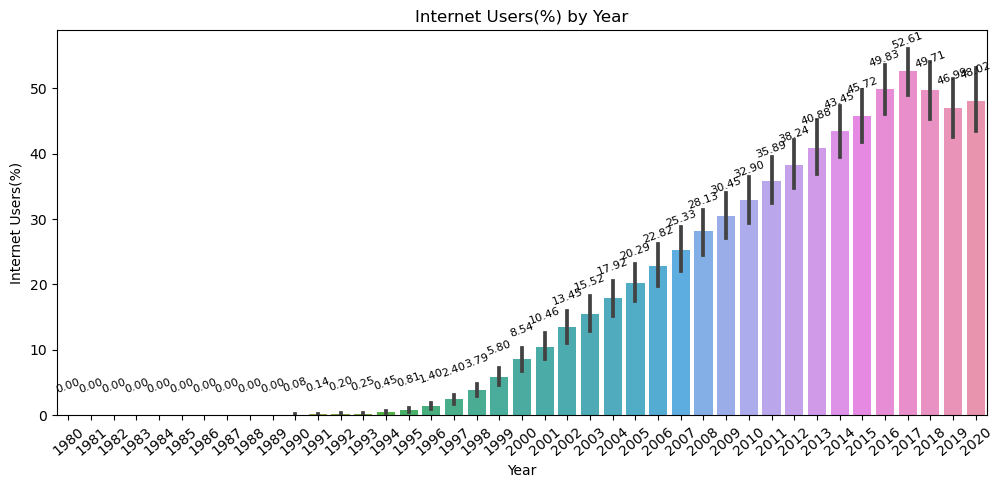

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
ax = sns.barplot(x="Year", y="Internet Users(%)", data=df)
plt.title("Internet Users(%) by Year")
plt.xlabel("Year")
plt.xticks(rotation=40)
plt.ylabel("Internet Users(%)")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
               (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', xytext=(0,15), textcoords='offset points', fontsize=8, rotation=20
               )
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


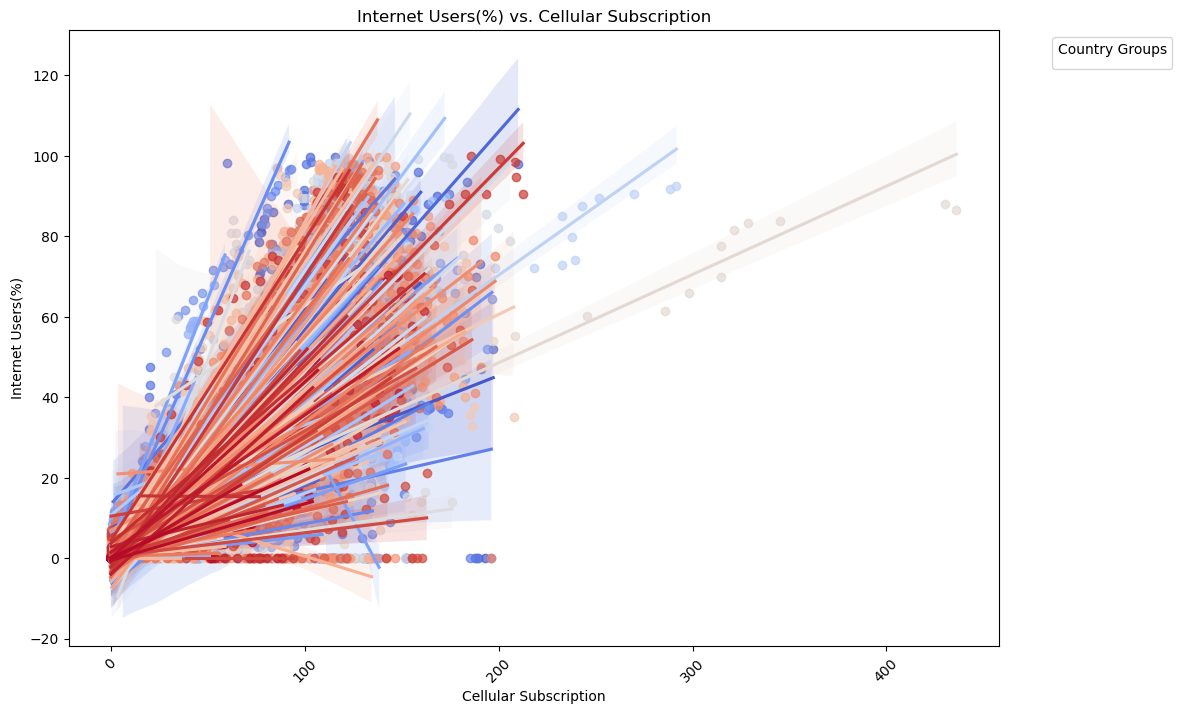

In [9]:
# Define color palette for mapping
color_palette = sns.color_palette('coolwarm', n_colors=len(df['Entity'].unique()))
plt.figure(figsize=(12, 8))
# Create a scatter plot with regression line for each country
for i, country in enumerate(df['Entity'].unique()):
    country_data = df[df['Entity'] == country]
    sns.regplot(x='Cellular Subscription', y='Internet Users(%)', data=country_data,
                scatter_kws={'alpha': 0.7, 'color': color_palette[i]},
                line_kws={'color': color_palette[i]})

plt.title('Internet Users(%) vs. Cellular Subscription')
plt.xlabel('Cellular Subscription')
plt.ylabel('Internet Users(%)')
plt.legend(title='Country Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

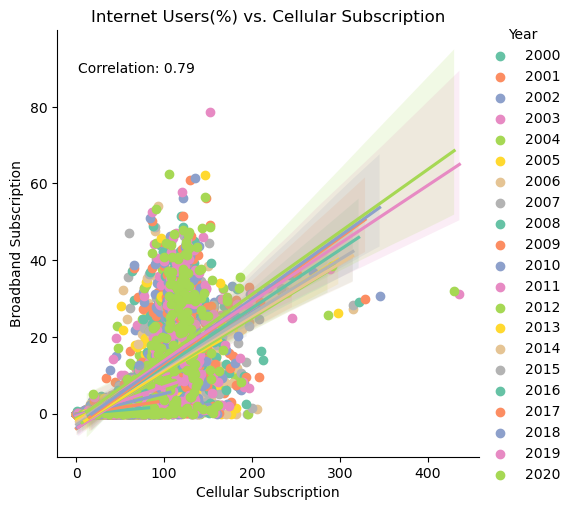

In [10]:

# Define color palette for mapping
color_palette = sns.color_palette('Set2', n_colors=len(df['Year'].unique()))
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
filtered_data = df[df['Year'] > 1999]

plt.figure(figsize=(12, 8))
sns.lmplot(x='Cellular Subscription', y='Broadband Subscription', data=filtered_data, scatter_kws={'alpha': 1}, hue='Year', palette=color_palette)

# Compute the correlation coefficient
correlation = df['Cellular Subscription'].corr(df['Internet Users(%)'])

plt.title('Internet Users(%) vs. Cellular Subscription')
plt.xlabel('Cellular Subscription')
plt.ylabel('Broadband Subscription')

# Add the correlation coefficient as text on the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()


# Machine Learning

## Note:

This notebook train the Random Forest Regression model on the training set and make predictions on the test set. Then, it evaluates the model's performance using mean squared error (MSE), which measures the average squared difference between the predicted and actual values. If the MSE is low, it indicates a good fit of the model to the data, supporting the hypothesis of a positive correlation between cellular subscription and internet usage.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [24]:
# Split the data into features (X) and target variable (y)
X = df[['Cellular Subscription']]
y = df['Internet Users(%)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 356.582665213781
R-squared (R2): 0.5840467033818391


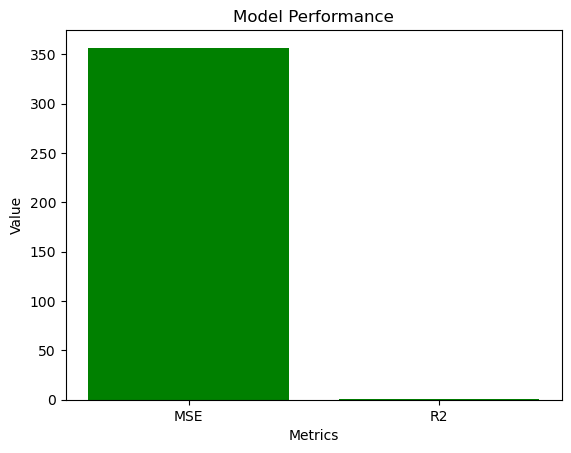

In [31]:
metrics = ['MSE', 'R2']
values = [mse, r2]

plt.bar(metrics, values, color='green')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')
plt.show()

In [32]:
import pandas as pd
import statsmodels.api as sm


# Define the features (X) and target variable (y)
X = df[['Cellular Subscription', 'No. of Internet Users', 'Broadband Subscription']]
y = df['Internet Users(%)']

# Add a constant column to X
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      Internet Users(%)   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     6907.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        16:49:45   Log-Likelihood:                -26242.
No. Observations:                6450   AIC:                         5.249e+04
Df Residuals:                    6446   BIC:                         5.252e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

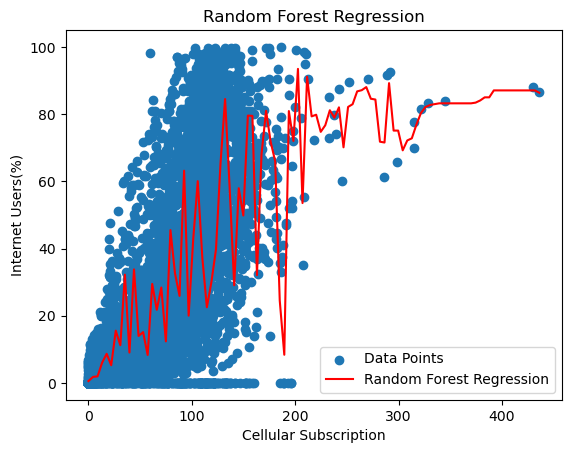

One possible hypothesis that can be made from this graph is that there is a positive correlation between cellular subscription and internet usage. The graph shows that as the number of mobile phone subscriptions per 100 people (cellular subscription) increases, the percentage of population accessing the internet (internet users (%)) also increases. This could be due to the fact that people who have access to mobile phones are more likely to have access to the internet as well, or that the increasing availability of mobile phones has made internet access more accessible to a wider population. This hypothesis could be further tested and analyzed using statistical methods.


In [71]:
from sklearn.ensemble import RandomForestRegressor

# Convert the features and target variable to numpy arrays
X = df[['Cellular Subscription']].values
y = df['Internet Users(%)'].values

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Generate a range of values for prediction
x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Make predictions using the trained model
y_pred = model.predict(x_pred)

# Visualize the data and predictions
plt.scatter(X, y, label='Data Points')
plt.plot(x_pred, y_pred, color='red', label='Random Forest Regression')
plt.xlabel('Cellular Subscription')
plt.ylabel('Internet Users(%)')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

print(f"One possible hypothesis that can be made from this graph is that there is a positive correlation between cellular subscription and internet usage. The graph shows that as the number of mobile phone subscriptions per 100 people (cellular subscription) increases, the percentage of population accessing the internet (internet users (%)) also increases. This could be due to the fact that people who have access to mobile phones are more likely to have access to the internet as well, or that the increasing availability of mobile phones has made internet access more accessible to a wider population. This hypothesis could be further tested and analyzed using statistical methods.")

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Make predictions using the trained model
y_pred = model.predict(X)

# Evaluate the model performance
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

# Analyze feature importance (if using ensemble model)
if isinstance(model, RandomForestRegressor):
    feature_importance = model.feature_importances_
    print("Feature Importance:", feature_importance)

# Draw conclusions based on R-squared and feature importance
if r2 > 0 and any(feature_importance > 0):
    print("Conclusion: The results support the hypothesis that there is a relationship between cellular subscription and internet usage.")
else:
    print("Conclusion: The results do not strongly support the hypothesis. Other factors may play a significant role in determining internet usage.")


Mean Squared Error (MSE): 61.7259649334226
Root Mean Squared Error (RMSE): 7.856587359243363
R-squared: 0.9268469464219129
Feature Importance: [1.]
Conclusion: The results support the hypothesis that there is a relationship between cellular subscription and internet usage.


In [74]:
# Convert the features and target variables to numpy arrays
X = df[['Cellular Subscription', 'Broadband Subscription']].values
y = df['Internet Users(%)'].values

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Calculate R-squared score
r2 = r2_score(y, y_pred)

# Get feature importances
feature_importance = model.feature_importances_

# Print out the R-squared score and feature importances
print("R-squared Score:", r2)
print("Feature Importance (Cellular Subscription):", feature_importance[0])
print("Feature Importance (Broadband Subscription):", feature_importance[1])

# Draw conclusions
if r2 > 0 and feature_importance[0] > 0 and feature_importance[1] > 0:
    print("Conclusion: The results support the hypothesis that there is a positive relationship between cellular subscription, broadband subscription, and internet usage.")
elif r2 > 0 and feature_importance[0] > 0:
    print("Conclusion: The results support the hypothesis that there is a positive relationship between cellular subscription and internet usage, but broadband subscription may not be a significant factor.")
elif r2 > 0 and feature_importance[1] > 0:
    print("Conclusion: The results support the hypothesis that there is a positive relationship between broadband subscription and internet usage, but cellular subscription may not be a significant factor.")
else:
    print("Conclusion: The results do not support the hypothesis.")

R-squared Score: 0.9689962564223511
Feature Importance (Cellular Subscription): 0.172432398477706
Feature Importance (Broadband Subscription): 0.8275676015222939
Conclusion: The results support the hypothesis that there is a positive relationship between cellular subscription, broadband subscription, and internet usage.
